Reading the libraries

In [276]:
## numpy could be used to perform mathematical computations in python cell 
import numpy as np

## Provides a good high level overview of the plots and advanced visualizatiou features
import seaborn as sns
import pandas as pd     ## Used to read the data
import seaborn as sns
import matplotlib.pyplot as plt   ## Used for plotting
import warnings              ## Used to suppress the warnings 
warnings.filterwarnings("ignore")  ## Used to ignore the warnings

Reading the data below.

In [277]:
df = pd.read_csv(r"C:\Users\myloe\OneDrive\Desktop\AB_NYC_2019.csv")

Taking a look at the head of the dataframe to understand the columns along with the values present.

In [278]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Let us now look at the shape of the dataframe just to get an understanding of the overall data size.

In [279]:
df.shape

(48895, 16)

We would now be looking at the object types for various features and the null values as well.

We see thta there are a lot of float and integer columns in the data. There are also a few object type columns that we must be addressing later.

In [280]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

Removing the Duplicates if any

In [281]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

### Missing Values
It is a very good library that is simple to use and provides a visualization to help us understand the missing values in the pandas dataframe respectively.

The white lines below indicate the missing values and dark lines for each column indicate that the values are present

In [282]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Drop unnecessary columns

In [283]:
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

Examining Changes

In [284]:
df.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Rreplace the missing values in 'reviews per month' by zero

In [285]:
df.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
df.reviews_per_month.isnull().sum()

0

Remove the NaN values from the dataset

In [286]:
df.isnull().sum()
df.dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [287]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [288]:
df.shape

(48895, 12)

Examine Continous Variables

In [289]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Get Correlation between different variables

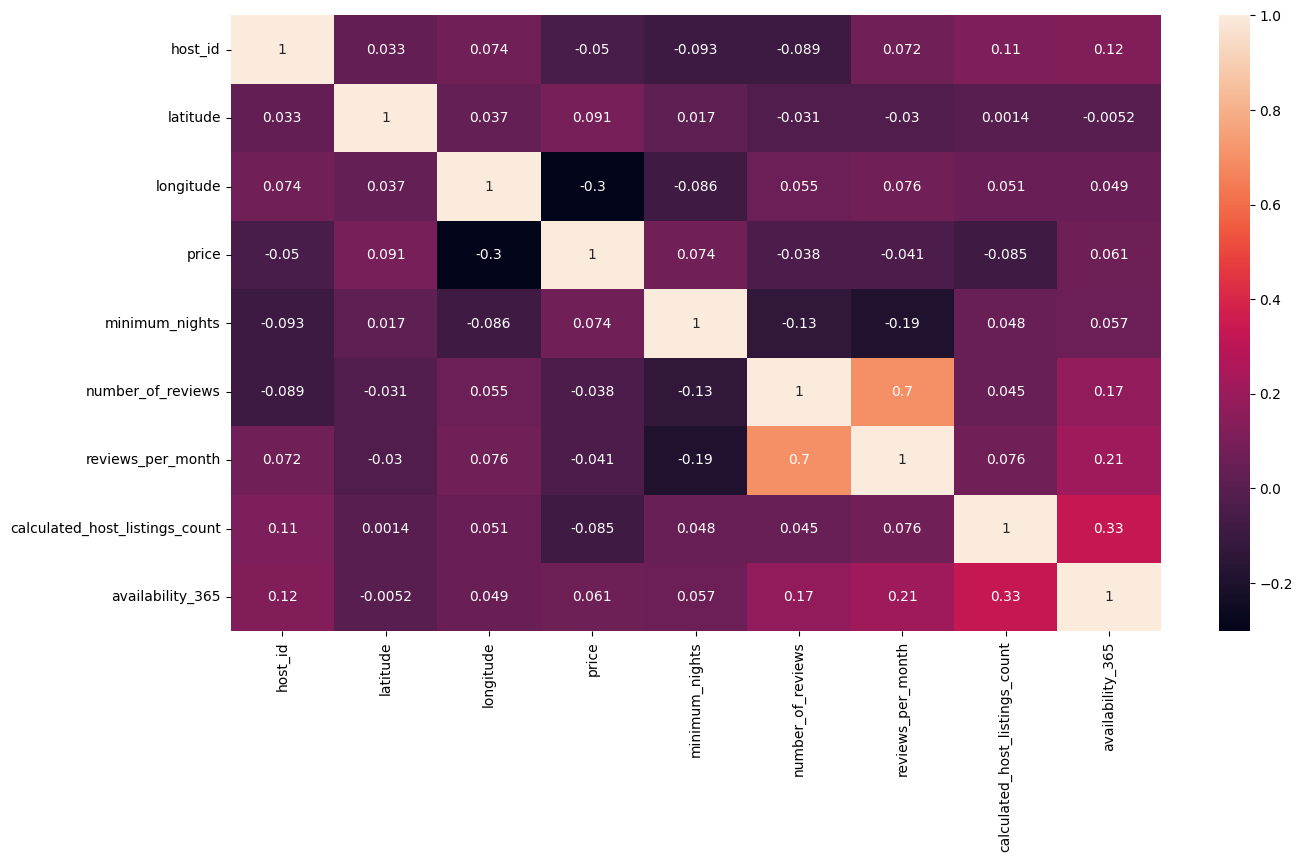

In [290]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df.columns
plt.show()

## Data visualization

In [291]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

## Plot all Neighbourhood Group

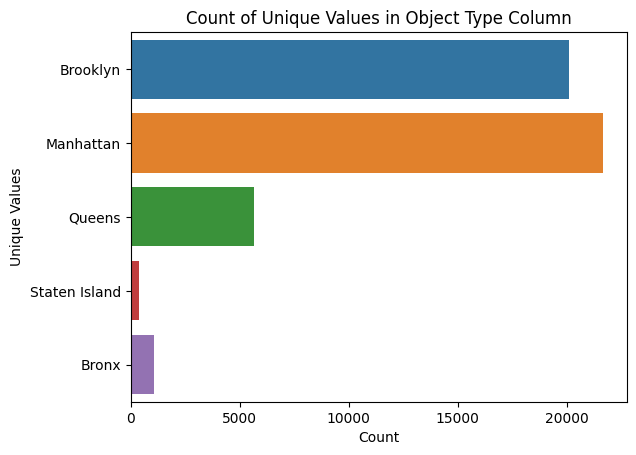

In [292]:
object_col = df['neighbourhood_group']

sns.countplot(y=object_col)

# Set plot title and labels
plt.title('Count of Unique Values in Object Type Column')
plt.xlabel('Count')
plt.ylabel('Unique Values')

plt.show()


## Neighbourhood

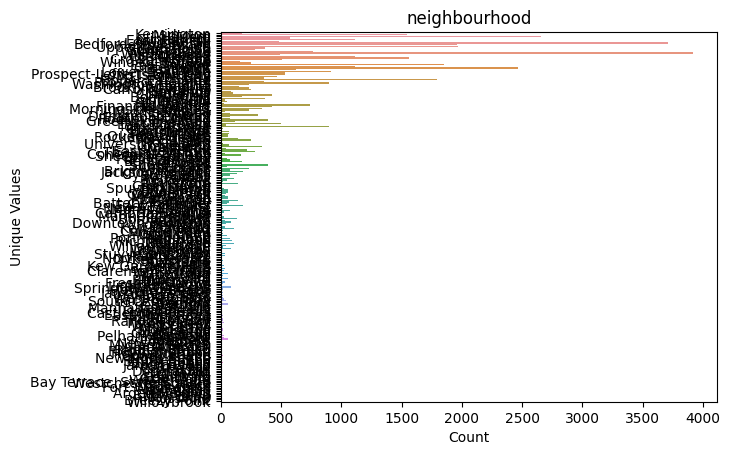

In [293]:
object_col = df['neighbourhood']

sns.countplot(y=object_col)

# Set plot title and labels
plt.title('neighbourhood')
plt.xlabel('Count')
plt.ylabel('Unique Values')

# Show the plot
plt.show()


## Room Type

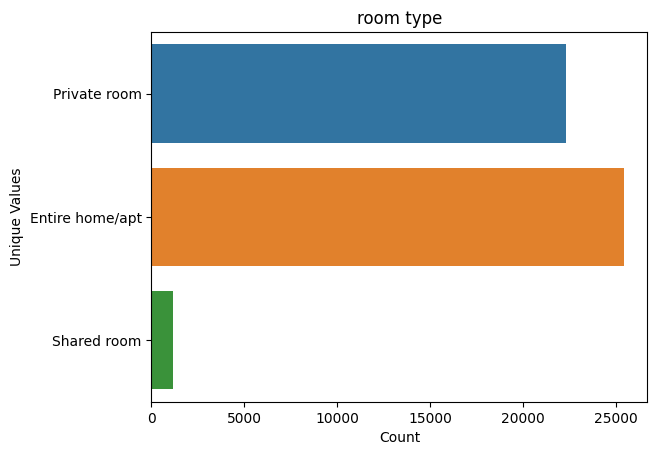

In [294]:
object_col = df['room_type']

sns.countplot(y=object_col)

# Set plot title and labels
plt.title('room type')
plt.xlabel('Count')
plt.ylabel('Unique Values')

# Show the plot
plt.show()

## Distribution of data based on longtitude and latitude

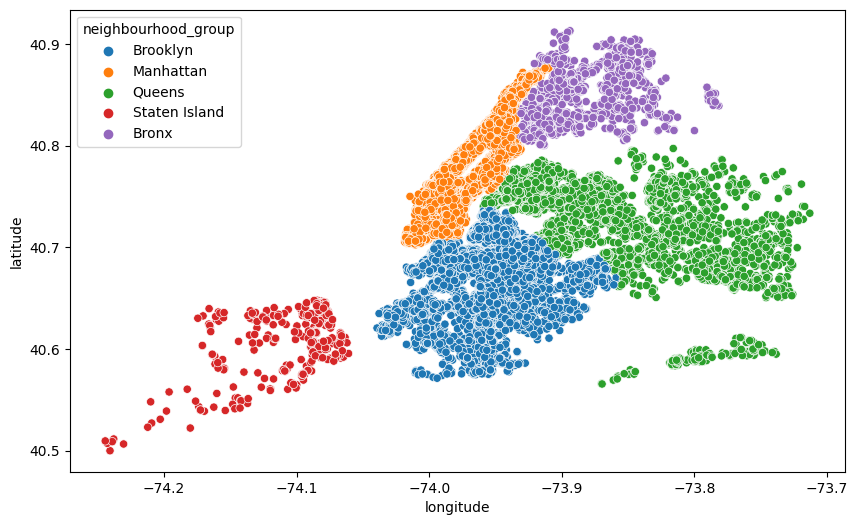

In [295]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df)
plt.ioff()
# Show the plot
plt.show()

## Word Cloud for neighborhood column

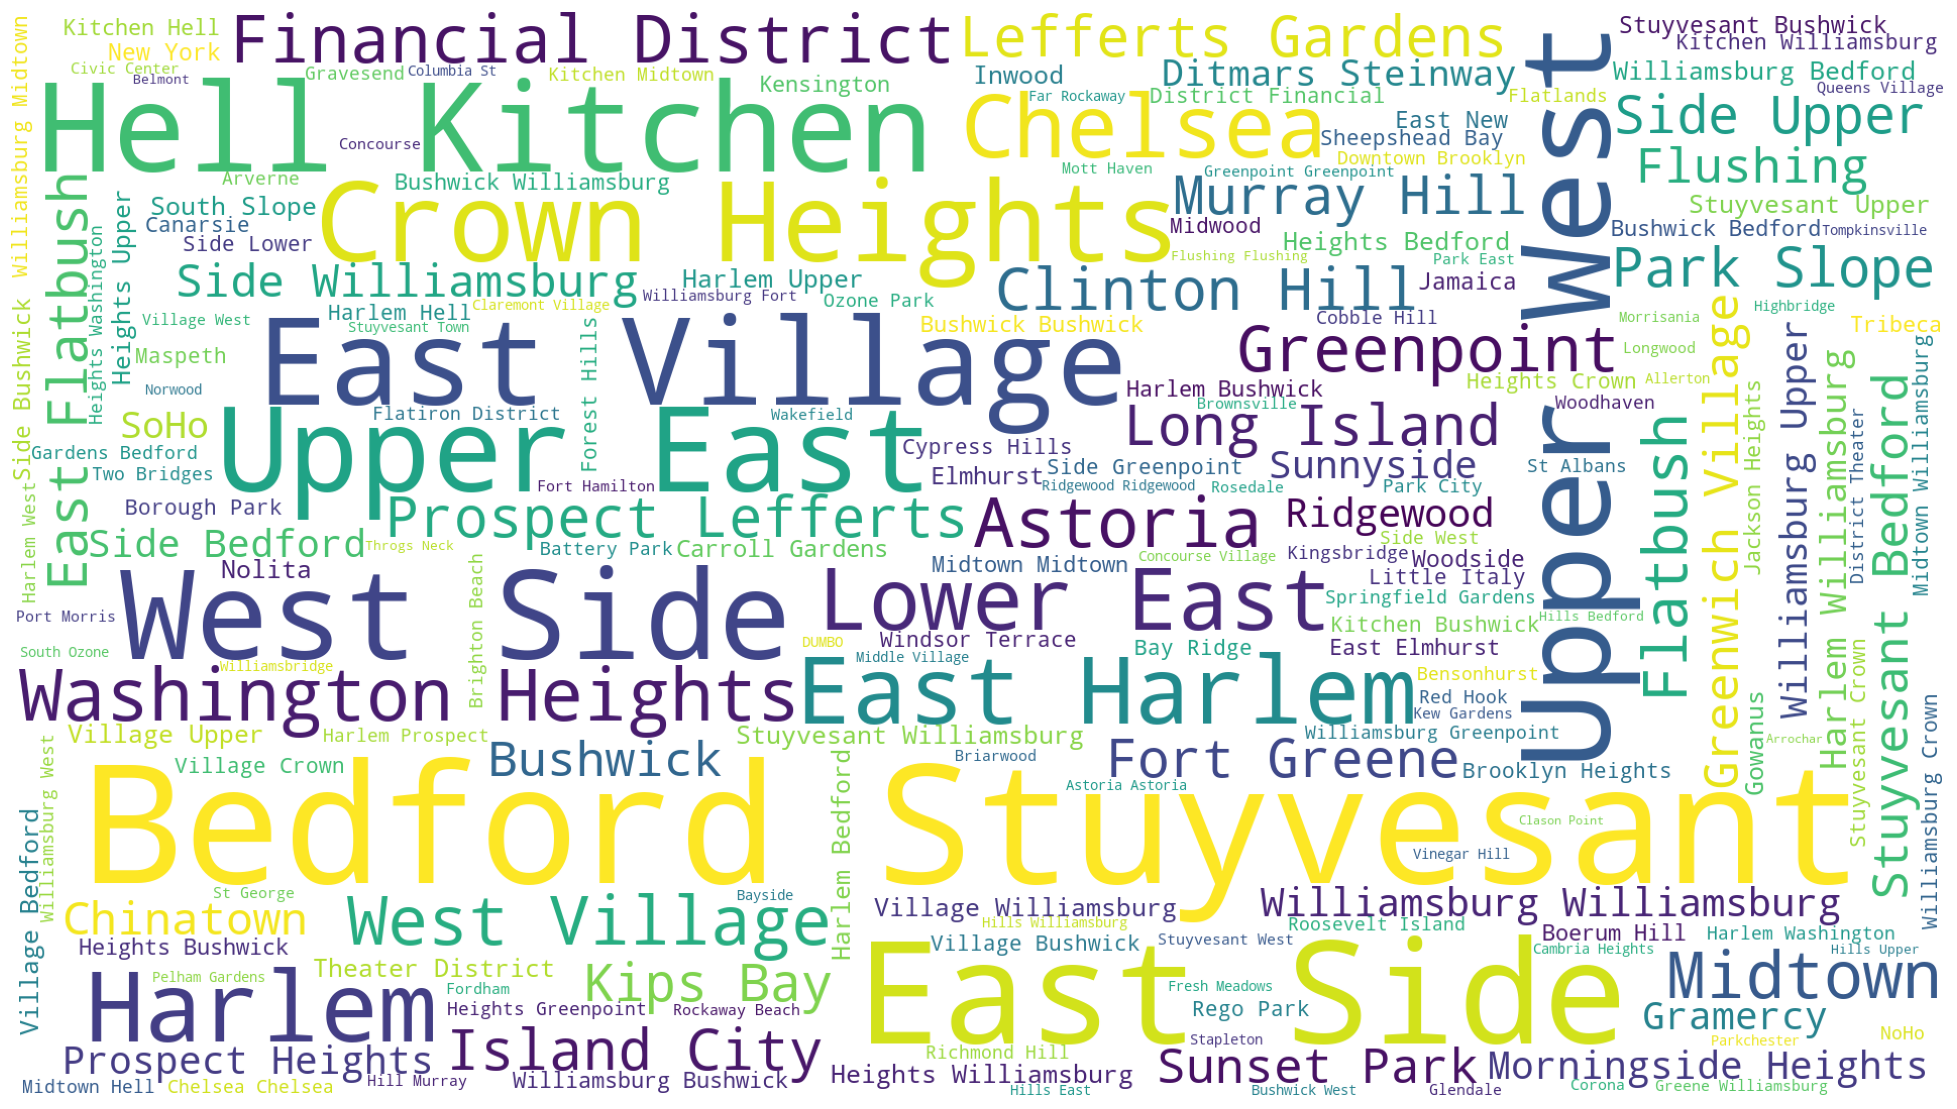

In [296]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

## Target (price) distribution plot

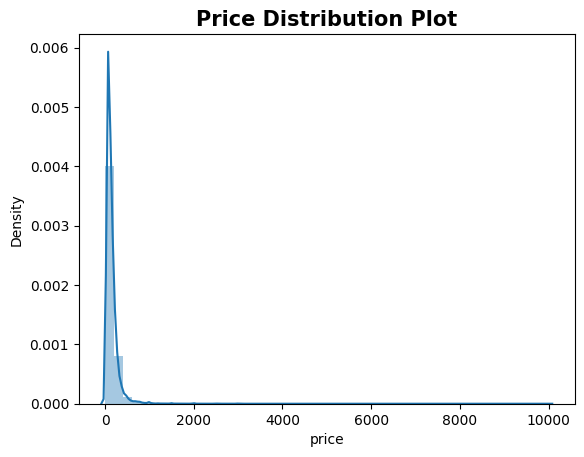

In [297]:

sns.distplot(df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')
# Show the plot
plt.show()

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

In [298]:
df['price_log'] = np.log(df.price+1)

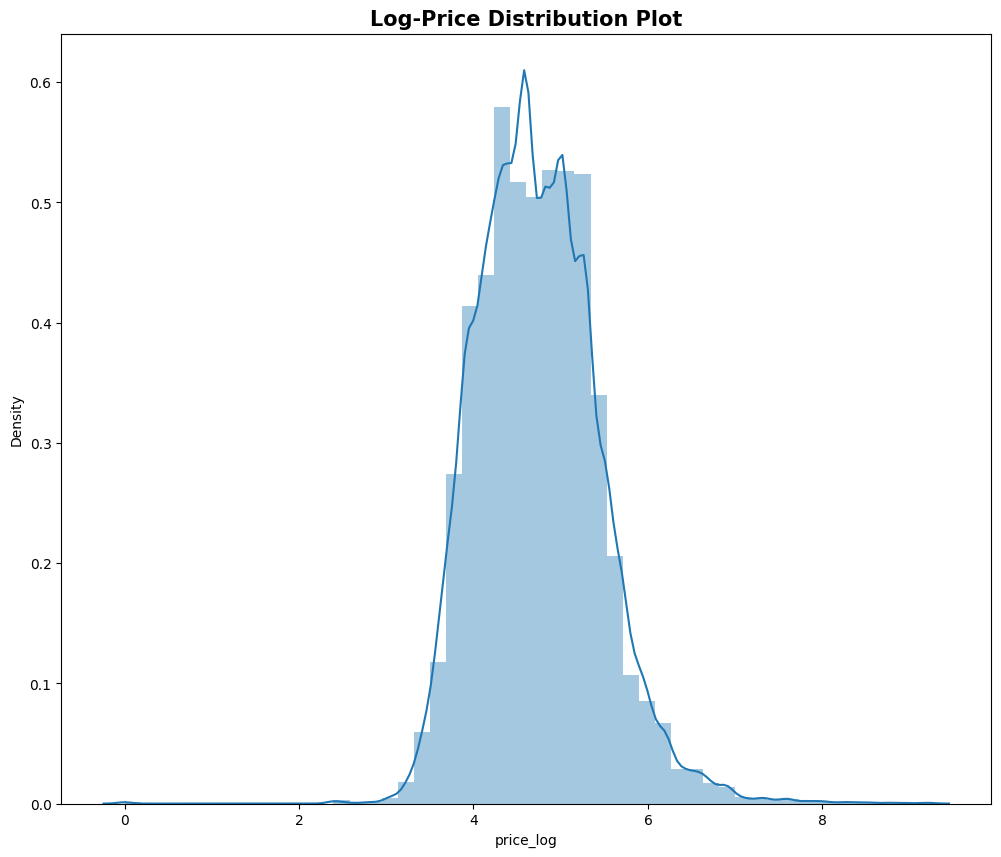

In [299]:
plt.figure(figsize=(12,10))
sns.distplot(df['price_log'])
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
plt.show()

In [300]:

df.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,5.017280
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449


## Regression Analysis

In [301]:
#Encode the input Variables
def Encode(df):
    for column in df.columns[df.columns.isin(['neighbourhood_group', 'room_type'])]:
        df[column] = df[column].factorize()[0]
    return df

df_en = Encode(df.copy())

In [302]:
df_en.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2787,0,Kensington,40.64749,-73.97237,0,149,1,9,0.21,6,365,5.010635
1,2845,1,Midtown,40.75362,-73.98377,1,225,1,45,0.38,2,355,5.420535
2,4632,1,Harlem,40.80902,-73.94190,0,150,3,0,0.00,1,365,5.017280
3,4869,0,Clinton Hill,40.68514,-73.95976,1,89,1,270,4.64,1,194,4.499810
4,7192,1,East Harlem,40.79851,-73.94399,1,80,10,9,0.10,1,0,4.394449


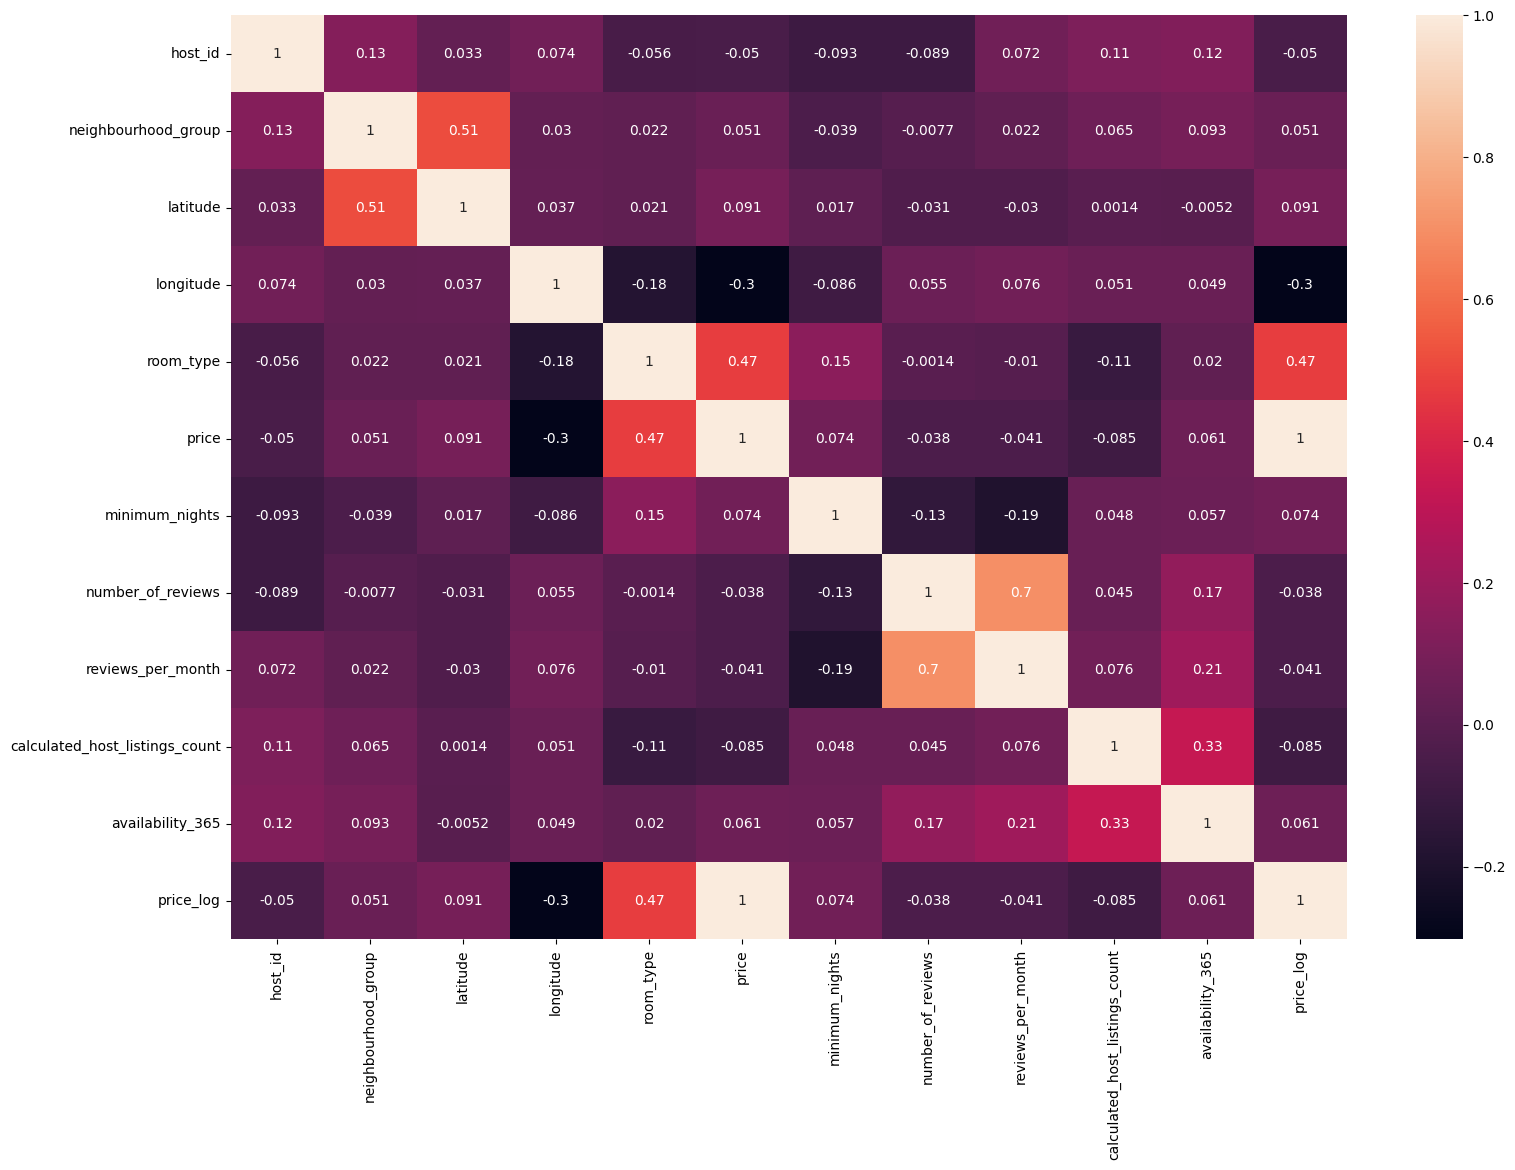

In [303]:
#Get Correlation between different variables
corr = df_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)

plt.show()

In [304]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [305]:
#Defining the independent variables and dependent variables
x = df_en.iloc[:,[0,1,3,4,5]]
y = df_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=0)
x_train.head()
y_train.head()

35962     65
3439      80
14959     65
38894     60
45692    106
Name: price, dtype: int64

In [306]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.05891044001312351